**Project: California Housing Price Prediction & Classification**
Objective:

Explore (EDA): Understand the relationships between different features and the median house value in California districts.

Linear Regression: Build a model to predict the continuous median house value.
Logistic Regression: Build a model to classify whether a district's median house value is "High" or "Low".

In [1]:
# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization Libraries ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Scikit-learn for Modeling ---
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# --- Scikit-learn for Evaluation ---
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# --- Set plotting style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- Load the Dataset ---
# fetch_california_housing returns a dictionary-like object
housing_data = fetch_california_housing()

# Create a pandas DataFrame
# The data is in the 'data' key, feature names in 'feature_names'
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# The target variable (Median House Value) is in the 'target' key
df['MedHouseVal'] = housing_data.target

# --- Initial Data Inspection ---
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   A

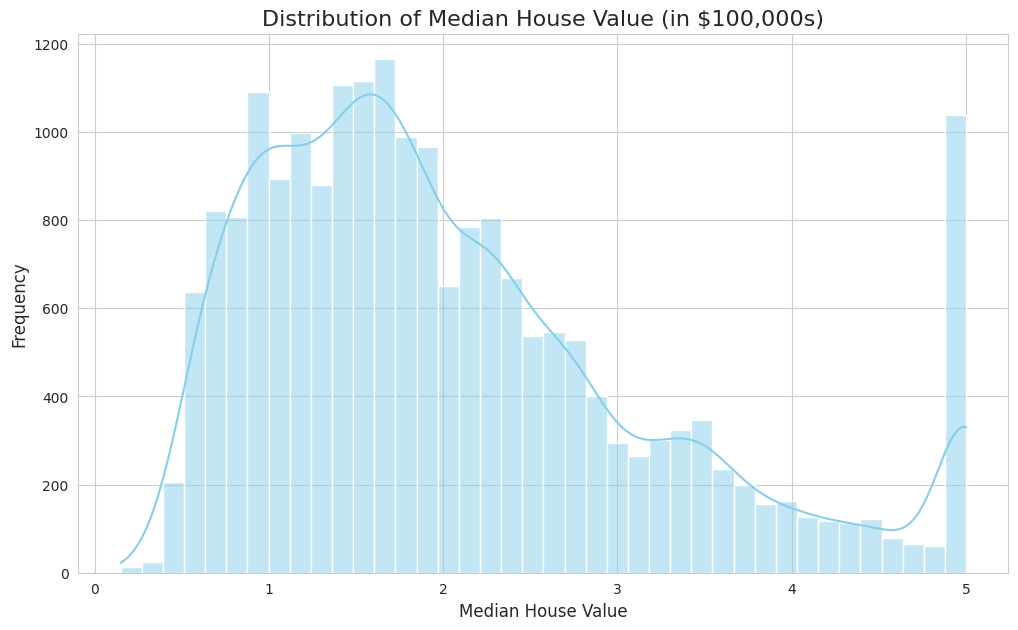

In [2]:
# Histogram and KDE plot for the target variable
plt.figure(figsize=(12, 7))
sns.histplot(df['MedHouseVal'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Median House Value (in $100,000s)', fontsize=16)
plt.xlabel('Median House Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

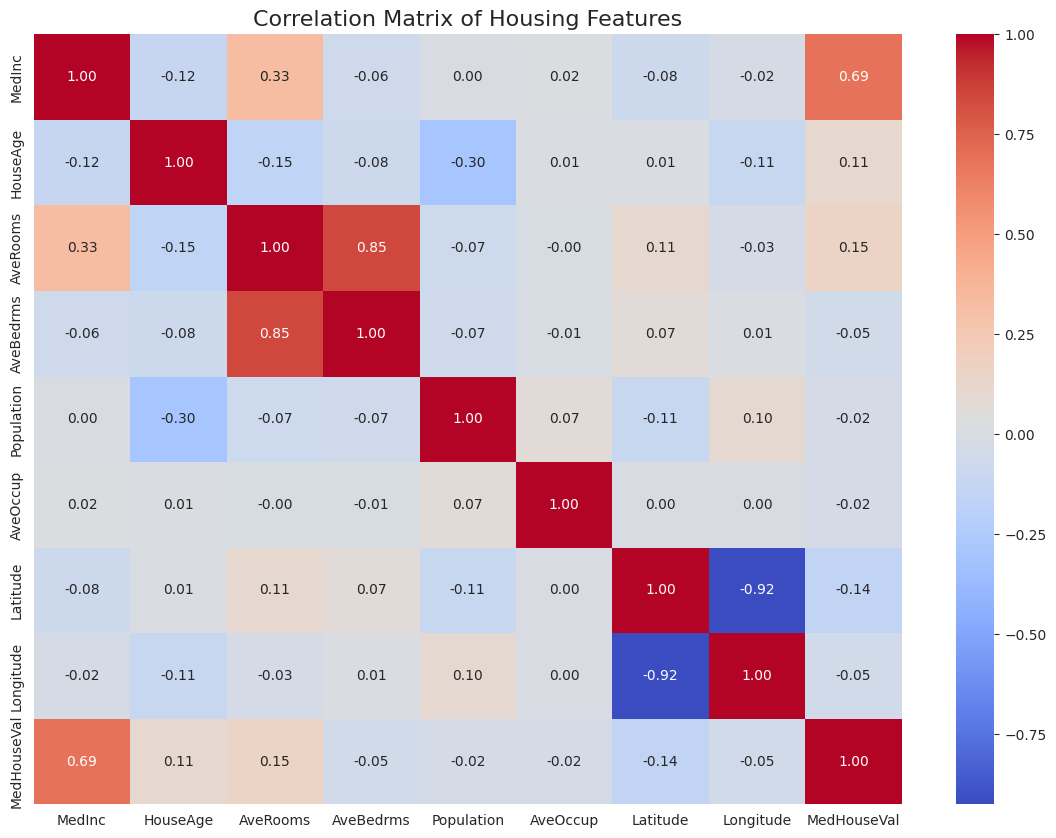

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features', fontsize=16)
plt.show()

## Correlation Matrix Heatmap: Interpretation & Insights

This chart shows the correlation matrix as a heatmap, based on the Pearson correlation coefficient between each feature in the dataset. Coefficient values range from -1 to +1:

- **Bright Red (+1.00):** Perfect positive correlation. As one variable increases, the other increases proportionally.
- **Bright Blue (-1.00):** Perfect negative correlation. As one variable increases, the other decreases proportionally.
- **White/Light Colors (near 0):** No linear correlation.
- The main diagonal is always bright red (1.00) since each feature is perfectly correlated with itself.

### Key Conclusions and Insights

#### 1. Most Important Predictor for House Value

- **MedInc (Median Income)** has the **strongest positive correlation** with **MedHouseVal (Median House Value)** at **+0.69**.
- This means: *As the median income in a district increases, the median house value also tends to increase.*
- This is a meaningful and intuitive relationship and is critical for predictive modeling.

#### 2. Other Relationships with House Value

- **AveRooms (Average Rooms per Dwelling):**  
  - Modest positive correlation with MedHouseVal (**+0.15**).  
  - Houses with more rooms tend to be slightly more expensive.
- **Latitude:**  
  - Slight negative correlation with MedHouseVal (**-0.14**).  
  - As you go further north, house prices tend to slightly decrease (which matches maps showing higher values in Southern California).

#### 3. Strong Correlations Between Features (Multicollinearity)

- **AveRooms and AveBedrms:**  
  - Very high correlation (**+0.85**).  
  - These features contain similar information; only one may be needed to avoid redundancy in advanced models.
- **Latitude and Longitude:**  
  - Very strong negative correlation (**-0.92**).  
  - This is due to California's shape: moving north (higher latitude) typically also means moving west (lower longitude).

#### 4. Features with Weak Correlation to House Value

- **Population, AveOccup (Average Occupancy), HouseAge:**  
  - All have weak linear correlations (values close to 0) with MedHouseVal.
  - These features may still provide value in non-linear models or help capture edge cases (e.g., very old or very new houses).

### Overall Conclusion

- The correlation matrix provides a quick overview of **linear relationships** in your data.
- **Median Income (MedInc) is the most powerful predictor** for median house value.
- **Multicollinearity** exists between some features (e.g., AveRooms and AveBedrms), which is important for model selection and feature engineering.
- **Geographic correlations** (latitude, longitude) confirm spatial patterns noticed in geographic plots.
- Some features, despite weak linear correlation, might still add value to more complex models.



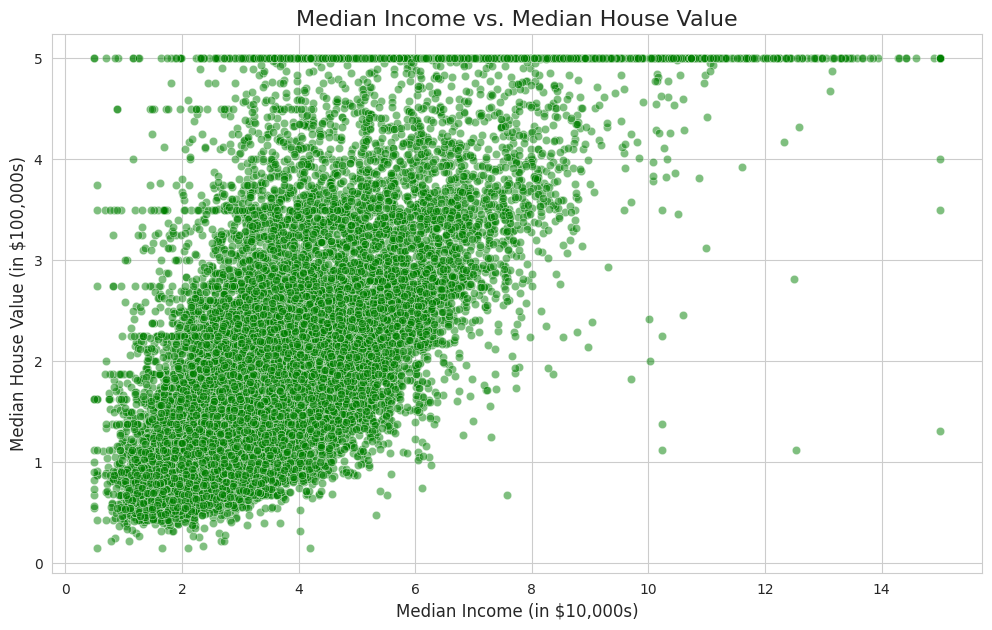

In [4]:
# Scatter plot to visualize the relationship between Median Income and Median House Value
plt.figure(figsize=(12, 7))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5, color='green')
plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income (in $10,000s)', fontsize=12)
plt.ylabel('Median House Value (in $100,000s)', fontsize=12)
plt.show()

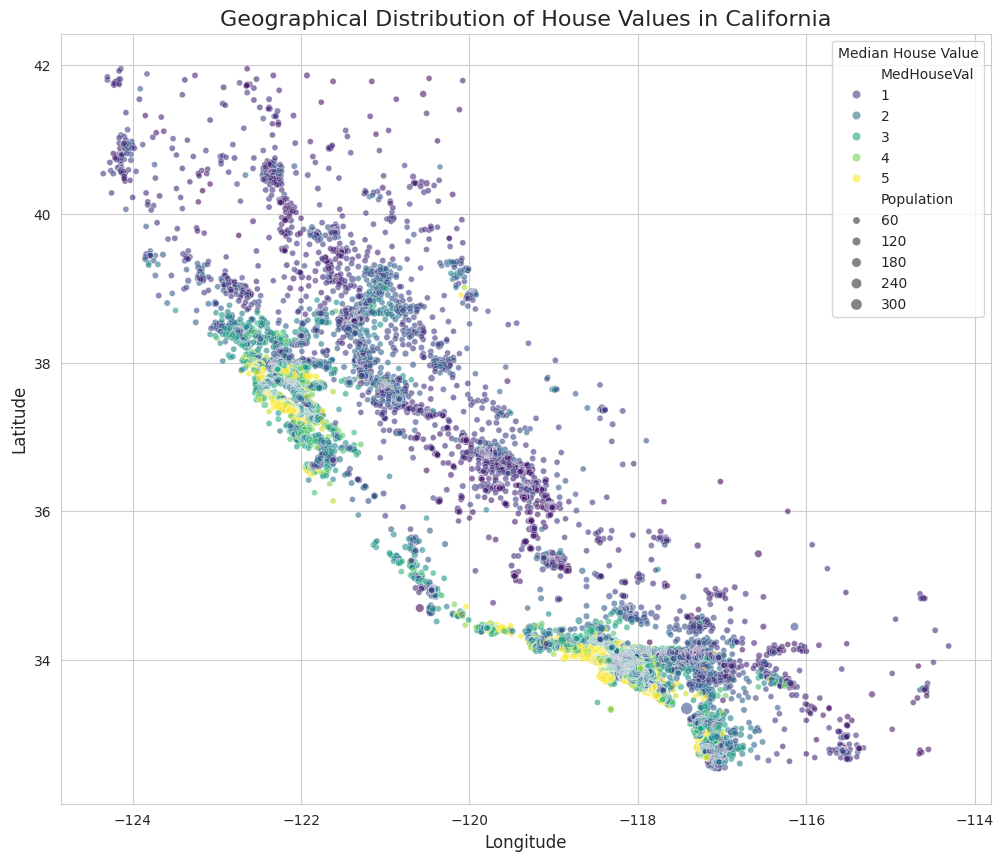

In [15]:
# --- CORRECTED Geographic scatter plot ---

# The fix is to add .values to the Series passed to the 's' parameter.
# This converts the pandas Series into a NumPy array, which seaborn/matplotlib handles perfectly.

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    data=df,
    hue='MedHouseVal',         # Color points by house value
    palette='viridis',         # A nice color map for this
    alpha=0.6,
    size=df['Population']/100  # Pass the Series directly to size
)
plt.title('Geographical Distribution of House Values in California', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Median House Value')
plt.show()


This is a scatter plot that maps California's census districts using their longitude (x-axis) and latitude (y-axis). The chart uses two visual cues to encode information about each district:

**Color**: Represents the Median House Value, ranging from low (dark purple/blue) to very high (bright yellow).

**Size**: Represents the population of the district, where larger dots indicate a higher population.

**Key Conclusions and Insights**

House Values are Geographically Concentrated: The most striking conclusion is that high house values are not spread out evenly. They are heavily clustered in specific coastal regions.

High-Value Hotspots: The bright yellow dots (highest value) are concentrated in two primary areas: the San Francisco Bay Area (around Latitude 37-38) and Southern California's coastal cities like Los Angeles and San Diego (around Latitude 33-34).

Lower-Value Regions: The vast majority of the inland areas, such as the Central Valley, and the northern parts of the state are dominated by dark purple and blue dots, indicating significantly lower median house values.

Population Density and House Value are Linked: The size of the dots reveals that the most populous areas are also the most expensive.

 The large dots (high population) are overwhelmingly located in the same coastal hotspots (Bay Area, LA) where the colors are green and yellow (high value).
  This suggests a strong relationship between urbanization, population density, and high housing costs.
  The "Coastal Premium" is Obvious: There is a clear visual pattern showing that proximity to the Pacific coast is a major driver of housing prices. As you move inland from the coast, the colors on the map consistently shift from yellows and greens to blues and purples.

**Overall Conclusion**
In essence, the chart powerfully illustrates that the real estate market in California is defined by a sharp divide between expensive, densely populated coastal metropolitan areas and more affordable, less populated inland regions. It visually confirms the common knowledge that housing in the San Francisco Bay Area and coastal Southern California is significantly more expensive than in the rest of the state.

In [6]:
# Define features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Linear Regression Model Trained!")

Linear Regression Model Trained!


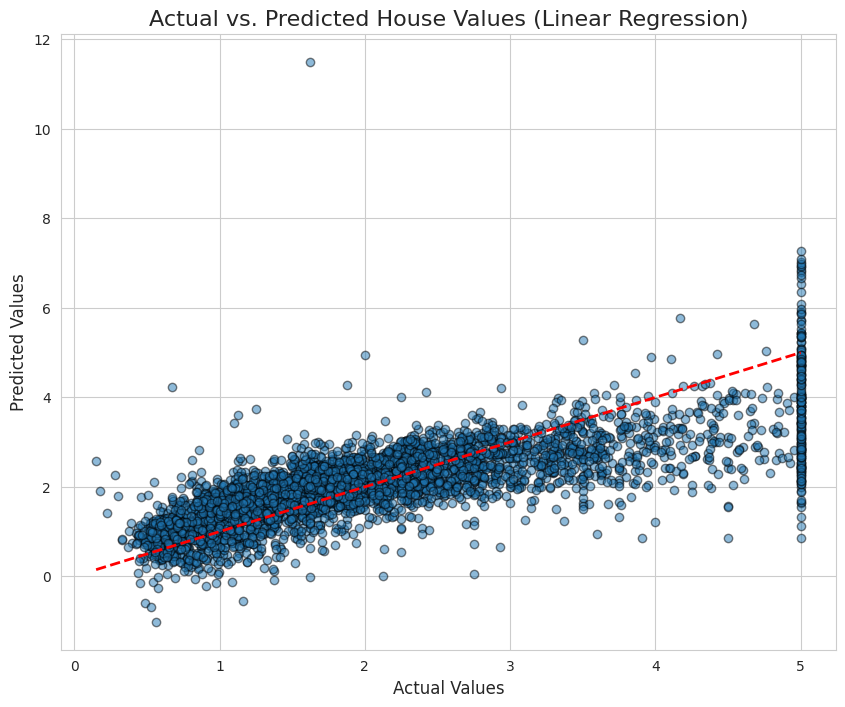

R-squared (R²): 0.5758
Root Mean Squared Error (RMSE): 0.7456


In [8]:
# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# --- Visualize Predictions vs. Actual Values ---
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_lin, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted House Values (Linear Regression)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.show()

# --- Calculate and Print Metrics ---
r2 = r2_score(y_test, y_pred_lin)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

In [9]:
# Find the median of the house values
median_val = df['MedHouseVal'].median()
print(f"The median house value is: {median_val:.2f}")

# Create a new binary target column: 1 for 'High Value', 0 for 'Low Value'
df['HighValue'] = (df['MedHouseVal'] > median_val).astype(int)

# Check the balance of our new classes
print("\nClass distribution for 'HighValue':")
print(df['HighValue'].value_counts())

The median house value is: 1.80

Class distribution for 'HighValue':
HighValue
0    10323
1    10317
Name: count, dtype: int64


In [10]:
# Define features (X) and our new binary target (y_class)
X_class = df.drop(['MedHouseVal', 'HighValue'], axis=1) # Drop original target and new one
y_class = df['HighValue']

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# --- Scale the features ---
# This is important for logistic regression to perform well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

In [11]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_c)

print("Logistic Regression Model Trained!")

Logistic Regression Model Trained!


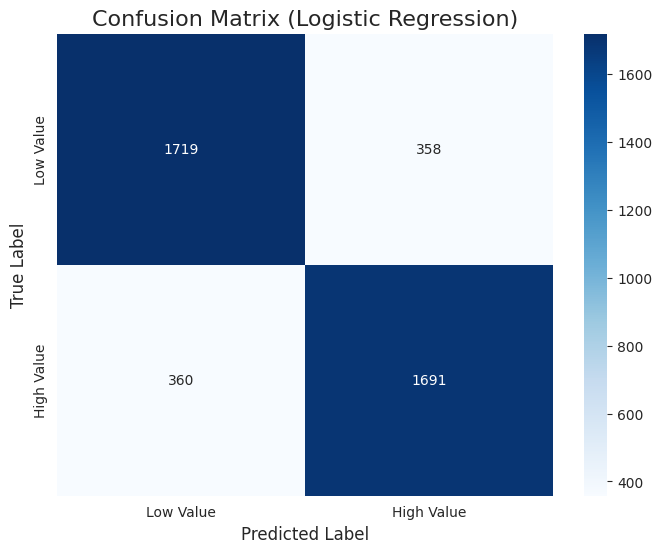

Classification Report:
              precision    recall  f1-score   support

   Low Value       0.83      0.83      0.83      2077
  High Value       0.83      0.82      0.82      2051

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128



In [12]:
# Make predictions on the scaled test set
y_pred_log = log_reg.predict(X_test_scaled)

# --- Generate and Visualize the Confusion Matrix ---
cm = confusion_matrix(y_test_c, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Value', 'High Value'],
            yticklabels=['Low Value', 'High Value'])
plt.title('Confusion Matrix (Logistic Regression)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# --- Generate and Print the Classification Report ---
report = classification_report(y_test_c, y_pred_log, target_names=['Low Value', 'High Value'])
print("Classification Report:")
print(report)

The image displays the performance evaluation of a binary classification model (specifically, a Logistic Regression).
 It consists of two main components:

**A Confusion Matrix**: A visual table that breaks down the model's predictions versus the actual true labels.

**A Classification Report**: A text-based summary of key classification metrics like precision, recall, and f1-score.


**Detailed Interpretation **

1. Confusion Matrix Analysis
The confusion matrix shows the performance on a test set with 4,128 samples.
True Label: The actual class of the data point.
Predicted Label: The class predicted by the model.


True Negatives (Top-Left): 1719
The model correctly predicted that 1,719 items were "Low Value".

False Positives (Top-Right): 358
The model incorrectly predicted that 358 items were "High Value" when they were actually "Low Value". This is a Type I error.

False Negatives (Bottom-Left): 360
The model incorrectly predicted that 360 items were "Low Value" when they were actually "High Value". This is a Type II error.

True Positives (Bottom-Right): 1691
The model correctly predicted that 1,691 items were "High Value".





**Conclusion**
The logistic regression model performs well and is quite balanced. An overall accuracy of 83% is a solid result. The nearly identical precision and recall scores for both classes (around 0.82-0.83) suggest that the model does not have a significant bias toward predicting one class over the other. The dataset itself is also well-balanced (2077 vs. 2051 samples), which contributes to the reliability of these metrics.

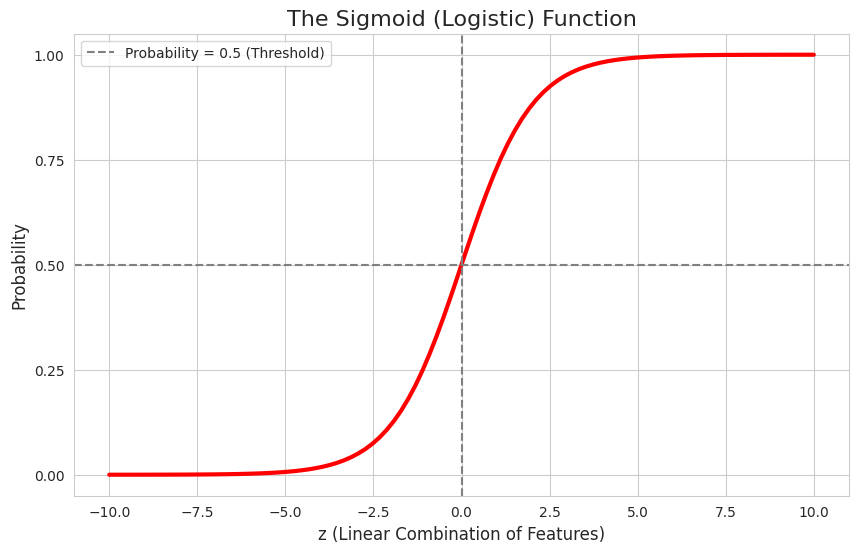

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

# --- Define the Sigmoid function ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- Generate data for the plot ---
# Create a range of values from -10 to 10
z = np.linspace(-10, 10, 100)
p = sigmoid(z)

# --- Create the plot ---
plt.figure(figsize=(10, 6))
plt.plot(z, p, color='red', lw=3)

# Add annotations and lines to make it clearer
plt.axhline(y=0.5, color='grey', linestyle='--', label='Probability = 0.5 (Threshold)')
plt.axvline(x=0.0, color='grey', linestyle='--')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z (Linear Combination of Features)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('The Sigmoid (Logistic) Function', fontsize=16)
plt.legend()
plt.show()

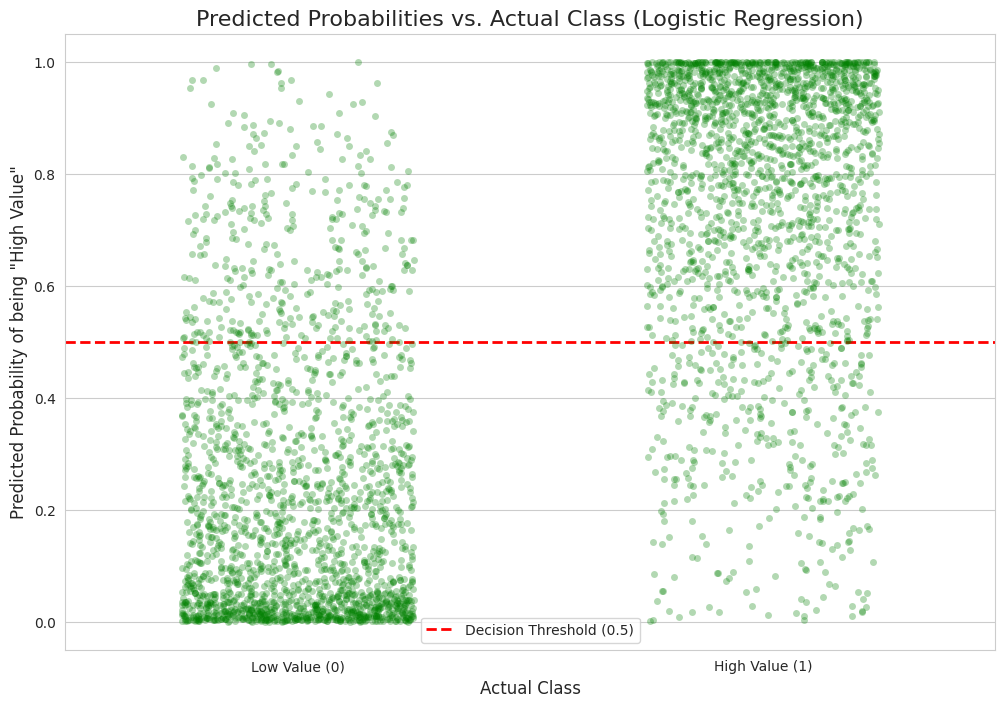

In [18]:


# --- 1. Get the predicted probabilities for the 'High Value' class ---
# .predict_proba() returns probabilities for [class 0, class 1]. We want the second column [:, 1].
predicted_probabilities = log_reg.predict_proba(X_test_scaled)[:, 1]

# --- 2. Create a DataFrame for easy plotting ---
results_df = pd.DataFrame({
    'TrueLabel': y_test_c,
    'PredictedProbability': predicted_probabilities
})

# --- 3. Create the plot ---
plt.figure(figsize=(12, 8))

# Use seaborn's stripplot for a clear visualization
# Jitter adds a small amount of random noise to the x-axis to prevent points from overlapping
sns.stripplot(x='TrueLabel', y='PredictedProbability', data=results_df, jitter=0.25, alpha=0.3, color='green')

# Add a horizontal line for the decision threshold
plt.axhline(y=0.5, color='red', linestyle='--', lw=2, label='Decision Threshold (0.5)')

plt.title('Predicted Probabilities vs. Actual Class (Logistic Regression)', fontsize=16)
plt.xlabel('Actual Class', fontsize=12)
plt.ylabel('Predicted Probability of being "High Value"', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Low Value (0)', 'High Value (1)'])
plt.legend()
plt.show()